# Ex. 5 Regularized Linear Regression and Bias vs Variance

## 1 Regularized Linear Regression

### 1.1 Visualizing the dataset 

In [2]:
# matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from scipy.optimize import minimize # for minimizing the cost function

In [27]:
datafile = 'data/ex5data1.mat'
mat = scipy.io.loadmat( datafile )

X = mat['X']
y = mat['y'].reshape(-1)
Xtest = mat['Xtest']
ytest = mat['ytest'].reshape(-1)
Xval = mat['Xval']
yval = mat['yval'].reshape(-1)

In [28]:
# add the bias terms
X = np.insert(X,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)

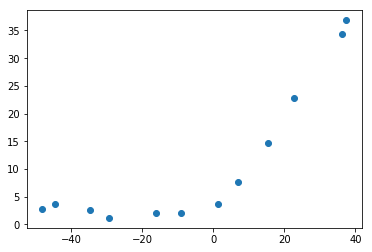

In [23]:
plt.scatter(X,y)

### 1.2 -1.4 Regularized linear regression 

In [25]:
np.insert(X,0,1,axis=1)

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [31]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(theta,X,y,mylambda = 0): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    m = y.size
    J = (1./(2 * m)) * ((h(theta,X)-y) @ (h(theta,X)-y))
    rgterm =  (theta[1:] @ theta[1:]) * (mylambda / (2 * m))
    return J + rgterm

In [32]:
Theta0 = np.array([1,1])

In [35]:
computeCost(Theta0,X,y,1)

303.9931922202643

In [44]:
def computeGradient(theta,X,y,mylambda = 0):
    
    m = y.size
    grad = (X.T @ (h(theta,X) - y)) / m
    rgterm = np.hstack((0,theta[1:] * mylambda / m))
    
    return grad + rgterm

In [45]:
computeGradient(Theta0,X,y,1)

array([-15.30301567, 598.25074417])

In [54]:
def miniCost(theta0,X,y,mylambda = .0,maxiter = 50):
    """
        minimizing the cost function
        theta0 must be a 1d array (obtained by unrolling the theta list)
    """
    
    result = minimize(computeCost, x0=theta0, args=(X,y,mylambda), method='CG',
                      jac = computeGradient, options={'maxiter':maxiter,'disp':False})

    return result.x # return the theta (1d array of n)

In [49]:
Theta_opm = miniCost(Theta0,X,y,mylambda=1,maxiter=50)

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


In [50]:
Theta_opm

array([13.08771802,  0.36774202])

In [52]:
h(Theta_opm,X)

array([ 7.22710241,  2.36694259, 26.39613568, 26.87517067, -4.58553294,
        9.79956822, 18.71703668,  0.32476576, 13.59856845, -3.23405543,
       15.66687743, 21.45853726])

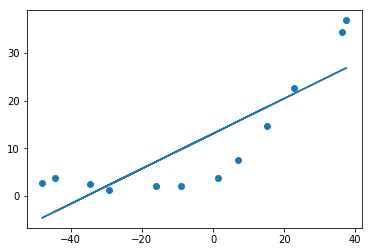

In [53]:
plt.scatter(X[:,1:],y)
plt.plot(X[:,1:],h(Theta_opm,X))

## 2 Bias-variance 

### 2.1 Learning curves 

In [60]:
def trainLinearReg(X,y,mylambda):
    
    theta0 = [1,1]
    theta_opt = miniCost(theta0,X,y,mylambda)
    
    return theta_opt

In [61]:
def computeErrors(theta,X,ytest):
    
    return computeCost(theta,X,ytest)

In [95]:
def learningCurve(X,y,Xval,yval,mylambda):
    
    m_lst = list(range(1,y.size))
    theta_lst = []
    error_train = []
    error_val = []
    for m in m_lst:
        theta_lst.append(trainLinearReg(X[1:m+1],y[1:m+1],mylambda))
        error_train.append(computeErrors(theta_lst[-1],X[1:m+1],y[1:m+1]))
        error_val.append(computeErrors(theta_lst[-1],Xval,yval))
    plt.plot(m_lst,error_train,label="Train")
    plt.plot(m_lst,error_val,label='Cross Validation')
    plt.legend()
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    return

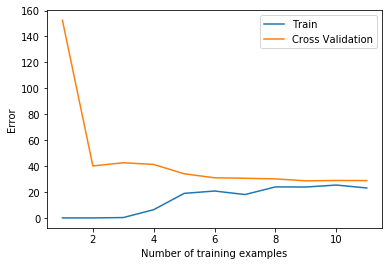

In [97]:
learningCurve(X,y,Xval,yval,0)